In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [2]:
#dataset
list_message = ["A bird in the hand is worth two in the bush", "The early bird gets the worm", "Time is money",
               "Honesty is the best policy"]

Aşağıdaki kod, list_message listesindeki kelimelerin sayısını hesaplar.

**CountVectorizer()** kullanılarak, kelime sayıları hesaplanır.

**toarray()** metodu, bir scipy.sparse matrisini, tam sayı veya kayan noktalı bir NumPy dizisi olarak dönüştürür. CountVectorizer ve TfidfVectorizer gibi metin işleme araçları, metin belgelerindeki sıklık matrislerini oluşturmak için genellikle seyrek matrisler olarak uygulanır. toarray() metodu, bu seyrek matrisleri daha sonra kullanılabilir NumPy dizilerine dönüştürmek için kullanılır.

Daha sonra bu matrisin transpozu alınır.

**get_feature_names_out()** yöntemi kullanılarak, kelime sözlüğü oluşturulur ve **words** değişkeninde saklanır.

In [4]:
# Create instance of count vectorizer
vectorizer = CountVectorizer()
# Perform word counts
Xfit = vectorizer.fit_transform(list_message)
# Generate feature matrix (transform so sample axis is in column direction)
X = Xfit.toarray().T
print("X: \n{}".format(X))
# list words in vocabulary (turn into numpy array)
words = np.array(vectorizer.get_feature_names_out())
print("Words: {}".format(words))

X: 
[[0 0 0 1]
 [1 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [2 0 0 0]
 [1 0 1 1]
 [0 0 1 0]
 [0 0 0 1]
 [2 2 0 1]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]]
Words: ['best' 'bird' 'bush' 'early' 'gets' 'hand' 'honesty' 'in' 'is' 'money'
 'policy' 'the' 'time' 'two' 'worm' 'worth']


Kelimelerin mesajlarda kaç kez geçtiğini sütun bazında toplayarak hesaplar. 

In [5]:
# Count number of times each word appears in all messages
# sum in column direction
word_count = np.sum(X,axis=1)
print("Word count: {}".format(word_count))
print("Words: {}".format(words))

Word count: [1 2 1 1 1 1 1 2 3 1 1 5 1 1 1 1]
Words: ['best' 'bird' 'bush' 'early' 'gets' 'hand' 'honesty' 'in' 'is' 'money'
 'policy' 'the' 'time' 'two' 'worm' 'worth']


bu kodda, kelime ve kelime sayısı verilerinin bulunduğu iki dizi kullanılarak bir kelime frekans sözlüğü oluşturulur.
generate_from_frequencies yöntemi kullanılır ve önceden oluşturulan kelime frekans sözlüğü bu yönteme parametre olarak veriyor.
WordCloud'un arka plan rengi beyaz olarak ayarlanır ve genişliği 1000 piksel, yüksekliği 600 piksel olarak belirlenir. Ayrıca, rasgele bir durum değeri de 11 olarak belirlenir.
**plt.imshow** fonksiyonu ile WordCloud görüntüsü ekrana çizilir ve 
**plt.show** fonksiyonu ile de görüntülenir.

dictionary: {'best': 1, 'bird': 2, 'bush': 1, 'early': 1, 'gets': 1, 'hand': 1, 'honesty': 1, 'in': 2, 'is': 3, 'money': 1, 'policy': 1, 'the': 5, 'time': 1, 'two': 1, 'worm': 1, 'worth': 1}


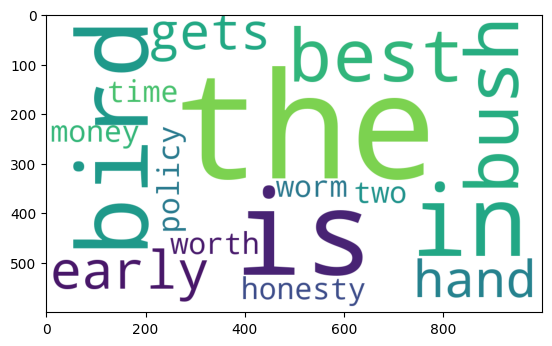

In [6]:
# create a dictionary key = word and value = word_count for each word
dict_freq = {words[i]:word_count[i] for i in range(np.size(words))}
print("dictionary: {}".format(dict_freq))
# use generate_from_frequencies approach for WordCloud
wc = WordCloud(background_color="white",width=1000,height=600, random_state=11).generate_from_frequencies(dict_freq)
plt.figure()
plt.imshow(wc)
plt.show()

CountVectorizer ile kelimeleri sayarak matris oluşturulmuştur.
"the", "is" ve "in" kelimeleri sayıma dahil edilmiyor. 
list_message listesindeki metinlerin kelime sayıları hesaplanır ve bir kelime sayım matrisi oluşturulur.

In [8]:
# Create instance of count vectorizer
vectorizer = CountVectorizer(stop_words=["the", "is", "in"])
# Perform word counts
Xfit = vectorizer.fit_transform(list_message)
# Generate feature matrix (transform so sample axis is in column direction)
X = Xfit.toarray().T
print("X: \n{}".format(X))
# list words in vocabulary (turn into numpy array)
words = np.array(vectorizer.get_feature_names_out())
print("Words: {}".format(words))

X: 
[[0 0 0 1]
 [1 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]]
Words: ['best' 'bird' 'bush' 'early' 'gets' 'hand' 'honesty' 'money' 'policy'
 'time' 'two' 'worm' 'worth']


Burada ise önceki kodda oluşturulan kelime sayım matrisinin X sütunu içinde kaç kez geçtiğini hesaplıyor. (np.sum)

In [9]:
# Count number of times each word appears in all messages
# sum in column direction
word_count = np.sum(X,axis=1)
print("Word count: {}".format(word_count))
print("Words: {}".format(words))

Word count: [1 2 1 1 1 1 1 1 1 1 1 1 1]
Words: ['best' 'bird' 'bush' 'early' 'gets' 'hand' 'honesty' 'money' 'policy'
 'time' 'two' 'worm' 'worth']


dictionary: {'best': 1, 'bird': 2, 'bush': 1, 'early': 1, 'gets': 1, 'hand': 1, 'honesty': 1, 'money': 1, 'policy': 1, 'time': 1, 'two': 1, 'worm': 1, 'worth': 1}


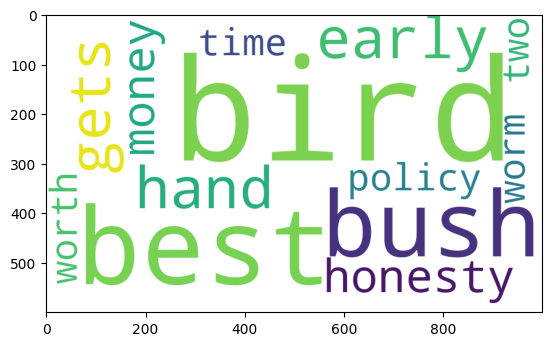

In [10]:
# create a dictionary key = word and value = word_count for each word
dict_freq = {words[i]:word_count[i] for i in range(np.size(words))}
print("dictionary: {}".format(dict_freq))
# use generate_from_frequencies approach for WordCloud
wc = WordCloud(background_color="white",width=1000,height=600, random_state=11).generate_from_frequencies(dict_freq)
plt.figure()
plt.imshow(wc)
plt.show()